# Introduction

Here we wish to investigate the effectiveness of variational method in solving electrodynamics problems. To do this we first solve the Poisson equation for a one dimentional Dirichle problem. And then put four different functions into the action and try to minimize it. Finally we plot all the results together to judge various sugested functions.
To do this project, I used SymPy. SymPy is a Python library for symbolic mathematics. you can find additional information about this library [in it's official website.](https://www.sympy.org/en/index.html)

# Calculations
First we need to import the library. 
p.s. The first line is for higher quality plots.

In [1]:
%config InlineBackend.figure_format = 'svg'
import sympy as sy
import sympy.plotting as plt

Now we Define mathematical variables and functions

In [2]:
rho, C1, C2, I1, I2, I3, I4 = sy.symbols('rho C1 C2 I1 I2 I3 I4')
g, psi = sy.symbols('g psi', cls=sy.Function)

## Poisson Equation
We know that the potential only depends $\rho$ so we can write Poisson equation as follows:

In [3]:
diffeq = sy.Eq(1/rho * (rho * psi(rho).diff(rho)).diff(rho), -g(rho))
sy.simplify(diffeq)

Eq(g(rho), -Derivative(psi(rho), (rho, 2)) - Derivative(psi(rho), rho)/rho)

### General Solution
Now that we have defined the differential equation to solve, we can use SymPy's "dsolve" function.

In [4]:
sy.dsolve(diffeq, psi(rho))

Eq(psi(rho), C1 + C2*log(rho) - log(rho)*Integral(rho*g(rho), rho) + Integral(rho*g(rho)*log(rho), rho))

This is the most general form of potential, to have a complete solution, we need to have $g(\rho)$ and also find $C_{1}$ and $C_{2}$ by dictating boundry conditions.

#### Solution with definite g($\rho$)

In [5]:
g = -5 * (1-rho) + 10000 * rho**5 * (1-rho)**5
diffeq = sy.Eq(1/rho * (rho * psi(rho).diff(rho)).diff(rho), -g)
equation = sy.dsolve(diffeq, psi(rho))
equation

Eq(psi(rho), C1 + C2*log(rho) + 625*rho**12/9 - 50000*rho**11/121 + 1000*rho**10 - 100000*rho**9/81 + 3125*rho**8/4 - 10000*rho**7/49 - 5*rho**3/9 + 5*rho**2/4)

At $\rho = 0$, the derivitive of $\psi(\rho)$ should vanish, so we have:

In [6]:
C2_solved = sy.nonlinsolve([rho, equation.rhs.diff(rho)], (rho, C2))
C2_solved.args[0][1]

0

In [7]:
equation = equation.subs({C2:C2_solved.args[0][1]})
equation

Eq(psi(rho), C1 + 625*rho**12/9 - 50000*rho**11/121 + 1000*rho**10 - 100000*rho**9/81 + 3125*rho**8/4 - 10000*rho**7/49 - 5*rho**3/9 + 5*rho**2/4)

Also at $\rho = 1$, the potential itself should vanish, so:

In [8]:
C1_solved = sy.nonlinsolve([rho - 1, equation.rhs], (rho, C1))
C1_solved.args[0][1]

464675/960498

Now we can arrive at a complete soloution.

### Compelete solution

In [9]:
equation = equation.subs({C1:C1_solved.args[0][1]})
equation

Eq(psi(rho), 625*rho**12/9 - 50000*rho**11/121 + 1000*rho**10 - 100000*rho**9/81 + 3125*rho**8/4 - 10000*rho**7/49 - 5*rho**3/9 + 5*rho**2/4 + 464675/960498)

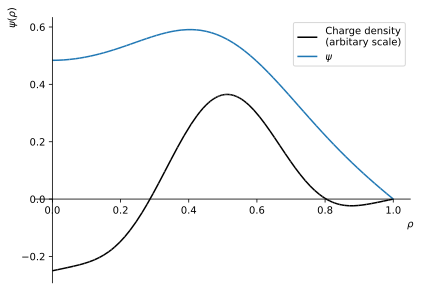

In [10]:
p1 = plt.plot(g*0.05, (rho, 0, 1), line_color='black', xlabel=r'$\rho$', ylabel=r'$\psi(\rho)$', label='Charge density\n(arbitary scale)', legend=True, show=False)
p2 = plt.plot(equation.rhs, (rho, 0, 1), label=r'$\psi$', show=False)
p1.append(p2[0])
p1.style = 'wireframe'
p1.show()

## First trial function: $\psi_{1}(\rho)$

From here until the end, instead of solving the Poisson equation, we need to put trial functions into the action given by 
$I[\psi] = \frac{1}{2}\int_{V}\nabla\psi\cdot\nabla\psi d^{3}x\, -\, \int_{V}g\psi d^{3}x$ and try to minimize it with respect to the free parameters.

In [11]:
alpha1, beta1, gamma1 = sy.symbols('alpha1 beta1 gamma1')
g, psi1 = sy.symbols('g psi1', cls=sy.Function)

In [12]:
equation1 = sy.Eq(psi1(rho), alpha1 * (1-rho) + beta1 * (1-rho)**2 + gamma1 * (1-rho)**3)
equation1

Eq(psi1(rho), alpha1*(1 - rho) + beta1*(1 - rho)**2 + gamma1*(1 - rho)**3)

Since we are working in cylindrical coordinates and our functions are only dependent on $\rho$, the integral we must calculate, significantly simplifies to:
$I[\psi] = 2\pi \times ( \frac{1}{2}\int_{0}^{1}\psi'(\rho)^{2}\rho d\rho\, -\, \int_{0}^{1}g\psi\rho d\rho)$,
where $\psi'(\rho)$ means derivitive with respect to $\rho$.

In [13]:
sy.Eq(I1, 2*sy.pi * (sy.integrate(equation1.rhs.diff(rho)**2 * rho, (rho, 0, 1))/2 - sy.integrate(equation1.rhs * g(rho) * rho, (rho, 0, 1))))

Eq(I1, 2*pi*(alpha1**2/4 + alpha1*beta1/3 + alpha1*gamma1/4 + beta1**2/6 + 3*beta1*gamma1/10 + 3*gamma1**2/20 + Integral(-alpha1*rho*g(rho), (rho, 0, 1)) + Integral(alpha1*rho**2*g(rho), (rho, 0, 1)) + Integral(-beta1*rho*g(rho), (rho, 0, 1)) + Integral(2*beta1*rho**2*g(rho), (rho, 0, 1)) + Integral(-beta1*rho**3*g(rho), (rho, 0, 1)) + Integral(-gamma1*rho*g(rho), (rho, 0, 1)) + Integral(3*gamma1*rho**2*g(rho), (rho, 0, 1)) + Integral(-3*gamma1*rho**3*g(rho), (rho, 0, 1)) + Integral(gamma1*rho**4*g(rho), (rho, 0, 1))))

#### Action with definite g($\rho$)

In [14]:
g = -5 * (1-rho) + 10000 * rho**5 * (1-rho)**5
I_psi1 = 2*sy.pi * (sy.integrate(equation1.rhs.diff(rho)**2 * rho, (rho, 0, 1))/2 - sy.integrate(equation1.rhs * g * rho, (rho, 0, 1)))
sy.Eq(I1, I_psi1)

Eq(I1, 2*pi*(alpha1**2/4 + alpha1*beta1/3 + alpha1*gamma1/4 - 1665*alpha1/4004 + beta1**2/6 + 3*beta1*gamma1/10 - 1997*beta1/12012 + 3*gamma1**2/20 - 997*gamma1/18018))

Depending on the set of equations we want to solve, we need to use either of these SymPy functions: *solveset*, *linsolve* or *nonlinsolve*.

In [15]:
params1 = sy.linsolve([I_psi1.diff(alpha1), I_psi1.diff(beta1), I_psi1.diff(gamma1)], [alpha1, beta1, gamma1])
params1

FiniteSet((2855/2574, 2855/5148, -34985/27027))

$\psi_{1}(\rho)$ with minimized parameters.

In [16]:
alpha1_sovled = params1.args[0][0]
beta1_sovled = params1.args[0][1]
gamma1_sovled = params1.args[0][2]
equation1 = equation1.subs({alpha1:alpha1_sovled, beta1:beta1_sovled, gamma1:gamma1_sovled})
equation1

Eq(psi1(rho), -2855*rho/2574 - 34985*(1 - rho)**3/27027 + 2855*(1 - rho)**2/5148 + 2855/2574)

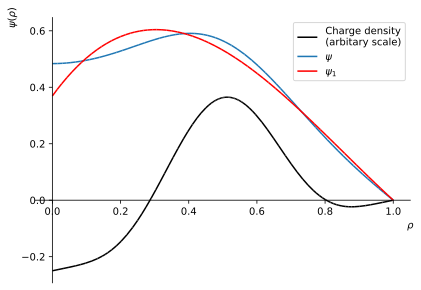

In [17]:
p3 = plt.plot(equation1.rhs, (rho, 0, 1), line_color='red', label=r'$\psi_{1}$', show=False)
p1.append(p3[0])
p1.show()

## Second trial function: $\psi_{2}(\rho)$

Here the procedure is the same as above, so I won't talk much more.

In [18]:
alpha2, beta2, gamma2 = sy.symbols('alpha2 beta2 gamma2')
g, psi2 = sy.symbols('g psi2', cls=sy.Function)

In [19]:
equation2 = sy.Eq(psi2(rho), alpha2 * rho**2 + beta2 * rho**3 + gamma2 * rho**4 - alpha2 - beta2 - gamma2)
equation2

Eq(psi2(rho), alpha2*rho**2 - alpha2 + beta2*rho**3 - beta2 + gamma2*rho**4 - gamma2)

In [20]:
sy.Eq(I2, 2*sy.pi * (sy.integrate(equation2.rhs.diff(rho)**2 * rho, (rho, 0, 1))/2 - sy.integrate(equation2.rhs * g(rho) * rho, (rho, 0, 1))))

Eq(I2, 2*pi*(alpha2**2/2 + 6*alpha2*beta2/5 + 4*alpha2*gamma2/3 + 3*beta2**2/4 + 12*beta2*gamma2/7 + gamma2**2 - Integral(rho*(rho - 1)*(alpha2*rho + alpha2 + beta2*rho**2 + beta2*rho + beta2 + gamma2*rho**3 + gamma2*rho**2 + gamma2*rho + gamma2)*g(rho), (rho, 0, 1))))

In [21]:
g = -5 * (1-rho) + 10000 * rho**5 * (1-rho)**5
I_psi2 = 2*sy.pi * (sy.integrate(equation2.rhs.diff(rho)**2 * rho, (rho, 0, 1))/2 - sy.integrate(equation2.rhs * g * rho, (rho, 0, 1)))
sy.Eq(I2, I_psi2)

Eq(I2, 2*pi*(alpha2**2/2 + 6*alpha2*beta2/5 + 4*alpha2*gamma2/3 + 7993*alpha2/12012 + 3*beta2**2/4 + 12*beta2*gamma2/7 + 7244*beta2/9009 + gamma2**2 + 7940*gamma2/9009))

In [22]:
params2 = sy.linsolve([I_psi2.diff(alpha2), I_psi2.diff(beta2), I_psi2.diff(gamma2)], [alpha2, beta2, gamma2])
params2

FiniteSet((35015/12012, -27145/3861, 3125/858))

In [23]:
alpha2_sovled = params2.args[0][0]
beta2_sovled = params2.args[0][1]
gamma2_sovled = params2.args[0][2]
equation2 = equation2.subs({alpha2:alpha2_sovled, beta2:beta2_sovled, gamma2:gamma2_sovled})
equation2

Eq(psi2(rho), 3125*rho**4/858 - 27145*rho**3/3861 + 35015*rho**2/12012 + 51175/108108)

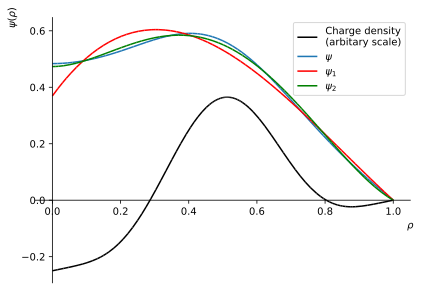

In [24]:
p4 = plt.plot(equation2.rhs, (rho, 0, 1), line_color='green', label=r'$\psi_{2}$', show=False)
p1.append(p4[0])
p1.show()

## Third trial function: $\psi_{3}(\rho)$

We may be interested in seeing what will happen if we add one higher term to the trial function.

In [25]:
alpha3, beta3, gamma3, omega3 = sy.symbols('alpha3 beta3 gamma3 omega3')
g, psi3 = sy.symbols('g psi3', cls=sy.Function)

In [26]:
equation3 = sy.Eq(psi3(rho), alpha3 * rho**2 + beta3 * rho**3 + gamma3 * rho**4 + omega3 * rho**5 - alpha3 - beta3 - gamma3 - omega3)
equation3

Eq(psi3(rho), alpha3*rho**2 - alpha3 + beta3*rho**3 - beta3 + gamma3*rho**4 - gamma3 + omega3*rho**5 - omega3)

In [27]:
sy.Eq(I3, 2*sy.pi * (sy.integrate(equation3.rhs.diff(rho)**2 * rho, (rho, 0, 1))/2 - sy.integrate(equation3.rhs * g(rho) * rho, (rho, 0, 1))))

Eq(I3, 2*pi*(alpha3**2/2 + 6*alpha3*beta3/5 + 4*alpha3*gamma3/3 + 10*alpha3*omega3/7 + 3*beta3**2/4 + 12*beta3*gamma3/7 + 15*beta3*omega3/8 + gamma3**2 + 20*gamma3*omega3/9 + 5*omega3**2/4 - Integral(rho*(rho - 1)*(alpha3*rho + alpha3 + beta3*rho**2 + beta3*rho + beta3 + gamma3*rho**3 + gamma3*rho**2 + gamma3*rho + gamma3 + omega3*rho**4 + omega3*rho**3 + omega3*rho**2 + omega3*rho + omega3)*g(rho), (rho, 0, 1))))

In [28]:
g = -5 * (1-rho) + 10000 * rho**5 * (1-rho)**5
I_psi3 = 2*sy.pi * (sy.integrate(equation3.rhs.diff(rho)**2 * rho, (rho, 0, 1))/2 - sy.integrate(equation3.rhs * g * rho, (rho, 0, 1)))
sy.Eq(I3, I_psi3)

Eq(I3, 2*pi*(alpha3**2/2 + 6*alpha3*beta3/5 + 4*alpha3*gamma3/3 + 10*alpha3*omega3/7 + 7993*alpha3/12012 + 3*beta3**2/4 + 12*beta3*gamma3/7 + 15*beta3*omega3/8 + 7244*beta3/9009 + gamma3**2 + 20*gamma3*omega3/9 + 7940*gamma3/9009 + 5*omega3**2/4 + 1133375*omega3/1225224))

In [29]:
params3 = sy.nonlinsolve([I_psi3.diff(alpha3), I_psi3.diff(beta3), I_psi3.diff(gamma3), I_psi3.diff(omega3)], [alpha3, beta3, gamma3, omega3])
params3

FiniteSet((28415/6732, -761465/65637, 44375/4862, -16000/7293))

In [30]:
alpha3_sovled = params3.args[0][0]
beta3_sovled = params3.args[0][1]
gamma3_sovled = params3.args[0][2]
omega3_sovled = params3.args[0][3]
equation3 = equation3.subs({alpha3:alpha3_sovled, beta3:beta3_sovled, gamma3:gamma3_sovled, omega3:omega3_sovled})
equation3

Eq(psi3(rho), -16000*rho**5/7293 + 44375*rho**4/4862 - 761465*rho**3/65637 + 28415*rho**2/6732 + 10675/23868)

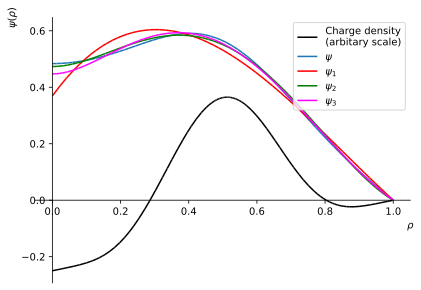

In [31]:
p5 = plt.plot(equation3.rhs, (rho, 0, 1), line_color='magenta', label=r'$\psi_{3}$', show=False)
p1.append(p5[0])
p1.show()

Amazingly adding another higher term not only didn't improve the result, It made it even worse!

## Fourth trial function: $\psi_{4}(\rho)$

We try one last option, to see how our trial function behaves if we only have odd powers of $\rho$.

In [32]:
alpha4, beta4, gamma4, omega4 = sy.symbols('alpha4 beta4 gamma4 omega4')
g, psi4 = sy.symbols('g psi4', cls=sy.Function)

In [33]:
equation4 = sy.Eq(psi4(rho), alpha4*rho**3 + beta4*rho**5 + gamma4*rho**7 + omega4*rho**11 - alpha4 - beta4 - gamma4 - omega4)
equation4

Eq(psi4(rho), alpha4*rho**3 - alpha4 + beta4*rho**5 - beta4 + gamma4*rho**7 - gamma4 + omega4*rho**11 - omega4)

In [34]:
sy.Eq(I4, 2*sy.pi * (sy.integrate(equation4.rhs.diff(rho)**2 * rho, (rho, 0, 1))/2 - sy.integrate(equation4.rhs * g(rho) * rho, (rho, 0, 1))))

Eq(I4, 2*pi*(3*alpha4**2/4 + 15*alpha4*beta4/8 + 21*alpha4*gamma4/10 + 33*alpha4*omega4/14 + 5*beta4**2/4 + 35*beta4*gamma4/12 + 55*beta4*omega4/16 + 7*gamma4**2/4 + 77*gamma4*omega4/18 + 11*omega4**2/4 - Integral(rho*(rho - 1)*(alpha4*rho**2 + alpha4*rho + alpha4 + beta4*rho**4 + beta4*rho**3 + beta4*rho**2 + beta4*rho + beta4 + gamma4*rho**6 + gamma4*rho**5 + gamma4*rho**4 + gamma4*rho**3 + gamma4*rho**2 + gamma4*rho + gamma4 + omega4*rho**10 + omega4*rho**9 + omega4*rho**8 + omega4*rho**7 + omega4*rho**6 + omega4*rho**5 + omega4*rho**4 + omega4*rho**3 + omega4*rho**2 + omega4*rho + omega4)*g(rho), (rho, 0, 1))))

In [35]:
g = -5 * (1-rho) + 10000 * rho**5 * (1-rho)**5
I_psi4 = 2*sy.pi * (sy.integrate(equation4.rhs.diff(rho)**2 * rho, (rho, 0, 1))/2 - sy.integrate(equation4.rhs * g * rho, (rho, 0, 1)))
sy.Eq(I4, I_psi4)

Eq(I4, 2*pi*(3*alpha4**2/4 + 15*alpha4*beta4/8 + 21*alpha4*gamma4/10 + 33*alpha4*omega4/14 + 7244*alpha4/9009 + 5*beta4**2/4 + 35*beta4*gamma4/12 + 55*beta4*omega4/16 + 1133375*beta4/1225224 + 7*gamma4**2/4 + 77*gamma4*omega4/18 + 215903*gamma4/223839 + 11*omega4**2/4 + 3863630*omega4/3936933))

In [36]:
params4 = sy.nonlinsolve([I_psi4.diff(alpha4), I_psi4.diff(beta4), I_psi4.diff(gamma4), I_psi4.diff(omega4)], [alpha4, beta4, gamma4, omega4])
params4

FiniteSet((3878195/3374514, -407422720/66927861, 585412115/104110006, -43462385/35057451))

In [37]:
alpha4_sovled = params4.args[0][0]
beta4_sovled = params4.args[0][1]
gamma4_sovled = params4.args[0][2]
omega4_sovled = params4.args[0][3]
equation4 = equation4.subs({alpha4:alpha4_sovled, beta4:beta4_sovled, gamma4:gamma4_sovled, omega4:omega4_sovled})
equation4

Eq(psi4(rho), -43462385*rho**11/35057451 + 585412115*rho**7/104110006 - 407422720*rho**5/66927861 + 3878195*rho**3/3374514 + 8579910635/15460335891)

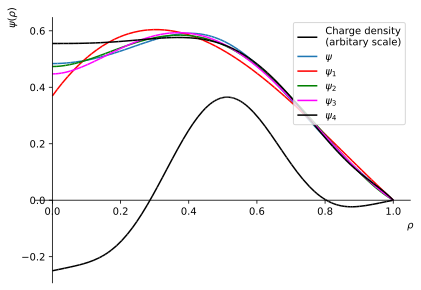

In [38]:
p6 = plt.plot(equation4.rhs, (rho, 0, 1), line_color='black', label=r'$\psi_{4}$', show=False)
p1.append(p6[0])
p1.show()

# Conclusion

By looking at how trial functions behaved, we can conclude that adding higher terms to our trial functios is only effective when those terms are themselves present in the original wave function. otherwise they can be distractive and we will get better results by only looking at first few lower terms. Also it is alot more computationally economic.